## 데이터 전처리
1. Label Encoding
2. One-Hot Encoding

In [1]:
### Label Encoding 예제
from sklearn.preprocessing import LabelEncoder

# 주어진 레이블
items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]

# Label Encoder 객체 생성
encoder = LabelEncoder()

encoder.fit(items)
labels = encoder.transform(items)

print('labels:', labels) # 각 아이템에 대한 Label Encoding 이후의 라벨
print('encoder.classes:', encoder.classes_) # Encoding한 클래스 출력
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))

labels: [0 1 5 4 2 3 2]
encoder.classes: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


In [2]:
### One-Hot Encoding 예제
import pandas as pd

df = pd.DataFrame({'items':items})
print(df)

print(pd.get_dummies(df))

   items
0     tv
1    냉장고
2    컴퓨터
3  전자레인지
4     믹서
5    선풍기
6     믹서
   items_tv  items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0         1          0         0          0            0          0
1         0          1         0          0            0          0
2         0          0         0          0            0          1
3         0          0         0          0            1          0
4         0          0         1          0            0          0
5         0          0         0          1            0          0
6         0          0         1          0            0          0


In [3]:
print(pd.get_dummies(df, drop_first=True)) # 첫 번째 label인 tv가 없어진 것을 확인할 수 있다

   items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0          0         0          0            0          0
1          1         0          0            0          0
2          0         0          0            0          1
3          0         0          0            1          0
4          0         1          0            0          0
5          0         0          1            0          0
6          0         1          0            0          0


## 데이터 스케일링
피쳐(feature)들마다 데이터값의 범위가 다르기 때문에 범위 차이가 클 경우   
데이터를 갖고 모델링할 때 0으로 수렴하거나 무한으로 발산   
--> 피쳐들 사이의 값들의 범위를 맞추어 주어서 비교가 가능하게 만들어주는 작업   

1. StandardScaler(): 평균이 0이고 분산이 1인 정규 분포로 만드는 것
2. MinMaxScaler(): 최댓값은 1, 최솟값은 0으로 최소-최대 정규화, 이상치에 취약
3. MaxAbsScaler():
4. RobustScaler(): 중앙값은 0/ IQR = 1, 이상치 영향을 최소화하고 더 넓게 분포
5. Normalizer(): column을 대상으로 함, 한 행의 모든 피쳐들 사이의 유클리드 거리가 1이 되도록 데이터값 생성, 빠르게 학습할 수 있고 overfitting 확률 낮춤

In [4]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target # 타겟 레이블 추가(0, 1로 구성 - False / True)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [41]:
# 1. Train, Test 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# 2. 분류 모델의 객체를 생성(설정)
dtc = DecisionTreeClassifier()

# 3. 학습용 데이터와 레이블로 DecisionTreeClassifier를 학습
dtc.fit(X_train, y_train)

# 4. 학습된 모델을 바탕으로 정확도 계산(using test data, label)
print('모델의 정확도 : ', round(dtc.score(X_test, y_test), 4))

모델의 정확도 :  0.9386


### 각각의 스케일러 사용 후의 데이터 분포 확인

In [47]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 : ', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 :  0.9298


In [49]:
X_train_scaled

array([[0.06552721, 0.25769361, 0.07732252, ..., 0.60137457, 0.52493594,
        0.52950153],
       [0.65620256, 0.57017247, 0.67420686, ..., 0.9975945 , 0.49931007,
        0.62190573],
       [0.07257946, 0.14034494, 0.08023901, ..., 0.174811  , 0.33845851,
        0.25313666],
       ...,
       [0.32317939, 0.2404464 , 0.30146536, ..., 0.11453608, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.30729834, ..., 0.62783505, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20842225, ..., 0.25536082, 0.22255076,
        0.11648016]])

In [60]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1) # 455 x 30, 1 --> 한 줄로 flatten
X_train_data = X_train.reshape(-1,1)                # 동일

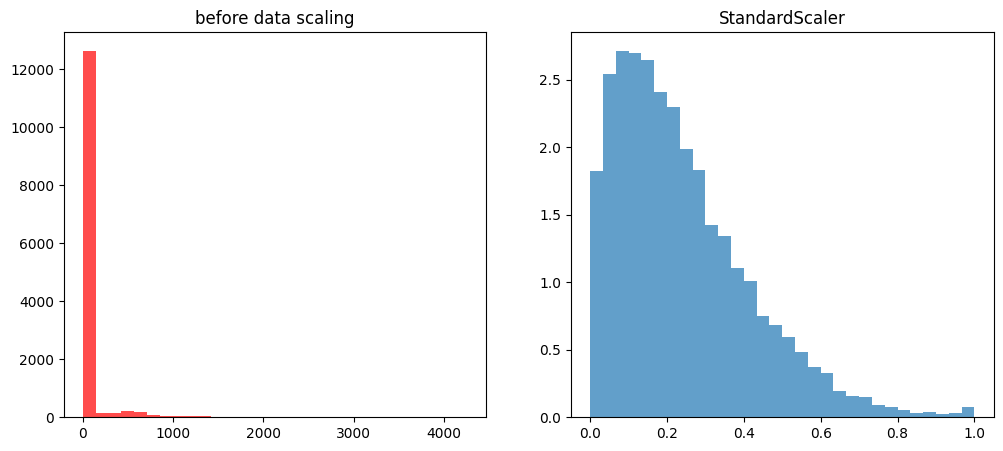

In [61]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')

plt.show()

In [67]:
# MinMaxSacler()
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 : ', round(dtc.score(X_test_scaled, y_test), 4))

X_train_scaled_mms = X_train_scaled.reshape(13650,1)  # 455 x 30, 1 --> 한 줄로 flatten

모델의 정확도 :  0.9386


In [68]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약
from sklearn.preprocessing import MaxAbsScaler

#절대값
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

X_train_scaled_mas = X_train_scaled.reshape(13650,1)

모델의 정확도 : 0.9298


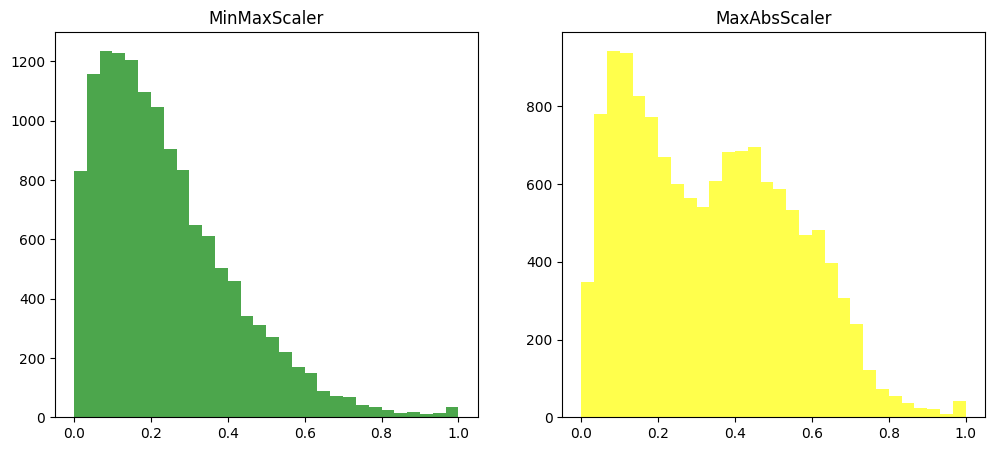

In [69]:
plt.figure(figsize=(12,5))

#스케일링 후의 데이터 값들이 0과 1사이에 분포
plt.subplot(1, 2, 1)
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled_mas, bins=30, color='yellow', alpha = 0.7)
plt.title('MaxAbsScaler')

plt.show()

In [70]:
# RobustScaler(): 중앙값은 0 / IQR(1분위(25%) ~ 3분위(75%)) = 1, 이상치(outlier) 영향 최소화하고 더 넓게 분포 됨
from sklearn.preprocessing import RobustScaler

#중앙값0/IQR 1
rbs = RobustScaler()

X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9386


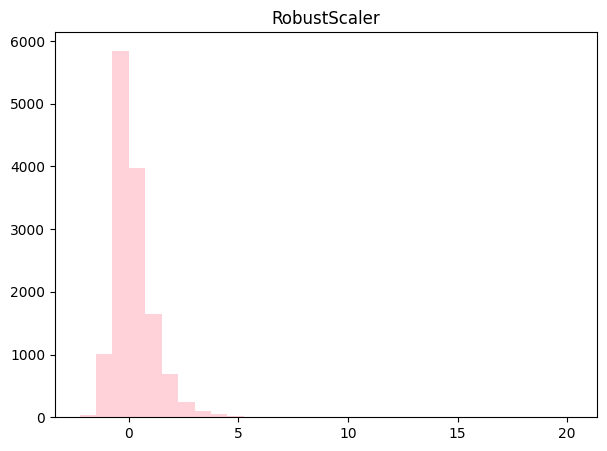

In [72]:
X_train_scaled_rbs = X_train_scaled.reshape(13650,1)

plt.figure(figsize=(7,5))
plt.hist(X_train_scaled_rbs, bins=30, color='pink', alpha = 0.7)
plt.title('RobustScaler')
plt.show()